## Data Science Competition 2019 
#### coding by glee1228@naver.com


### Colab 연동하기

In [94]:
from google.colab import drive
import os

if os.path.exists('/content/gdrive')==False:
  drive.mount('/content/gdrive')
  print('Google Drive is mounted\n')
else:
  print('Google Drive is already mounted\n')

Google Drive is already mounted



### 시각화 라이브러리 import

In [95]:
import matplotlib
import matplotlib.pyplot as plt

print("Matplotlib version", matplotlib.__version__)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Matplotlib version 3.0.3


In [5]:
import seaborn as sns
print("Seaborn version : ", sns.__version__)
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

Seaborn version :  0.9.0


### 한글폰트 설정하기

In [6]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq


Selecting previously unselected package fonts-nanum.
(Reading database ... 130811 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [7]:
import matplotlib.font_manager as fm  # 폰트 관련 용도
# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 47
nanum_font number: 31


In [15]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.6.7
설정 폰트 글꼴: ['NanumGothic Eco'], 설정 폰트 사이즈: 12.0


In [18]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


In [0]:
# 우선 fm._rebuild() 를 해주면 이제 준비가 완료되었다.
fm._rebuild()

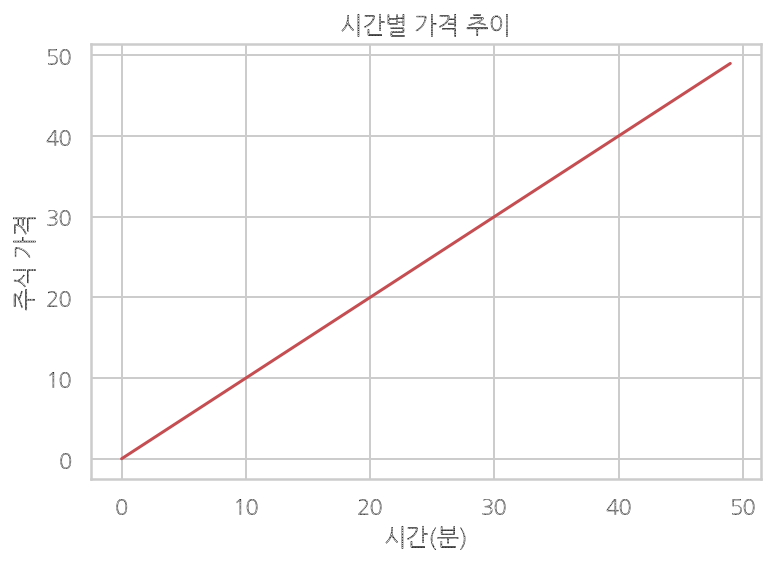

In [20]:
# 그려보자
plt.plot(range(50), range(50), 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('seaborn-pastel')
plt.show()

### 데이터 확인하기

In [21]:
! ls /content/gdrive/My\ Drive/Colab\ Notebooks/dsc2019

DSC2019_예선_데이터.xlsx   st_data_goldForeign.tsv     st_data_koreaIndex.tsv
KOSPI200.csv		   st_data_goldKorea.tsv       st_data_oilForeign.tsv
st_data_exchange.tsv	   st_data_goodsForeign.tsv    st_data_oilKorea.tsv
st_data_foreignCharge.tsv  st_data_itemChargeFull.tsv


### 학습데이터 로딩

In [103]:
import numpy as np
import pandas as pd
from pandas.io.parsers import read_csv

# 학습데이터 로딩
# 전체 데이터
dsc2019 = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/dsc2019/DSC2019_예선_데이터.xlsx')
# 금 데이터
goldKorea = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_goldKorea.tsv',sep='\t') 
goldForeign = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_goldForeign.tsv',sep='\t')
# 유가 데이터
oilKorea = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_oilKorea.tsv',sep='\t')
oilForeign = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_oilForeign.tsv',sep='\t')
# 환율 데이터
exchange = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_exchange.tsv',sep='\t')
# 원자재 데이터
goodsForeign = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_goodsForeign.tsv',sep='\t')
# 
foreignCharge = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_foreignCharge.tsv',sep='\t')
# 주식 데이터
itemChargeFull = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_itemChargeFull.tsv',sep='\t')
# 한국 지수 데이터
koreaIndex = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_koreaIndex.tsv',sep='\t')


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 우선 금(Gold) 과 유가(Oil) , 원자재(Goods) 데이터의 통계량과 분포형태 및 대칭정도를  확인해보자! 

st_data_goldForeign.tsv

st_data_oilForeign.tsv

st_data_goodsForeign.tsv


In [0]:
import datetime

def convertToDatetime(df):
  try:
    dates=[]
    for i in df['date']:
      date=str(i)
      convertDate = datetime.datetime.strptime(date,'%Y%m%d').date()
      dates.append(convertDate)
  
    df['date'] = pd.to_datetime(dates)
  except :
    print('Datetime으로 type이 이미 변환되었습니다.')
  return df

def groupByItem(df):
  return df.groupby(df['itemcode'])


def setDateIndex(df):
  df=df.set_index('date',inplace=False)
  return df

def getItemCodes(df):
  return df['itemcode'].unique()

def getItemNames(df):
  return df['itemname'].unique()

def getCodeNames(df):
  codes = getItemCodes(df)
  names = getItemNames(df)
  return zip(codes,names)

def getGraph(df,colName):
  dummy=setDateIndex(df)
  code = getItemCodes(dummy)
  name = getItemNames(dummy)
  print('{}({})'.format(name[0],code[0]))
  end_date = dummy.index[-1] + datetime.timedelta(days=10)
  plt.plot(dummy.index,dummy[colName],label=name)
  plt.text(end_date, dummy[colName][-1], str(name[0]), weight = 'bold', fontsize=12)
  plt.xlabel(dummy.index.name)
  plt.ylabel(colName)
    

### 모든 데이터들 dictionary로 묶자

In [0]:
# Date (Int) -> Date(DateTime)
goldKorea=convertToDatetime(goldKorea)
goldForeign=convertToDatetime(goldForeign)
oilKorea=convertToDatetime(oilKorea)
oilForeign=convertToDatetime(oilForeign)
exchange=convertToDatetime(exchange)
goodsForeign=convertToDatetime(goodsForeign)
foreignCharge=convertToDatetime(foreignCharge)
itemChargeFull=convertToDatetime(itemChargeFull)
koreaIndex=convertToDatetime(koreaIndex)


allDataDict={'goldKorea':goldKorea,'goldForeign':goldForeign,'oilKorea':oilKorea,'oilForeign':oilForeign,'exchange':exchange,'goodsForeign':goodsForeign,'foreignCharge':foreignCharge,'itemChargeFull':itemChargeFull,'koreaIndex':koreaIndex}


### 금의 item종류

In [106]:
print(goldForeign['itemcode'].unique())
print(goldForeign['itemname'].unique())

['COM@GC' 'NYM@PA' 'NYM@PL' 'COM@SI']
['국제 금' '팔라듐' '백금' '은']


### 원유의 item종류

In [107]:
print(oilForeign['itemcode'].unique())
print(oilForeign['itemname'].unique())

['IPE@EB' 'NYM@CL' 'NYM@DC']
['브렌트유' 'WTI(서부텍사스유) ' '두바이유']


### 원자재의 item종류

In [108]:
print(goodsForeign['itemcode'].unique())
print(goodsForeign['itemname'].unique())

['LME@AAY' 'CBT$BO' 'CBT$C' 'LME@CDY' 'NYM@HO' 'LME@NDY' 'NYM@NG'
 'LME@PDY' 'CBT$RR' 'CBT$S' 'NYB@SB' 'LME@SDY' 'CBT$SM' 'CBT$W' 'LME@ZDY']
['알루미늄합금' '대두유' '옥수수' '구리' '난방유' '니켈' '천연가스' '납' '쌀' '대두' '설탕' '주석' '대두박'
 '소맥' '아연']


In [0]:
gGoldForeign=goldForeign.groupby(goldForeign['itemcode'])
gOilForeign=oilForeign.groupby(oilForeign['itemcode'])
gGoodsForeign = goodsForeign.groupby(goodsForeign['itemcode'])

In [110]:
print(goldForeign.info())
print(goldKorea.info())
print(type(gGoldForeign))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 8 columns):
itemcode      1333 non-null object
itemname      1333 non-null object
date          1333 non-null datetime64[ns]
close_val     1333 non-null float64
change_val    1327 non-null float64
open_val      1333 non-null float64
high_val      1333 non-null float64
low_val       1333 non-null float64
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 83.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 10 columns):
date                 323 non-null datetime64[ns]
deal_val             323 non-null float64
change_val           323 non-null float64
change_rate          323 non-null float64
buy_val              323 non-null float64
sell_val             323 non-null float64
deposit_val          323 non-null float64
withdraw_val         323 non-null float64
international_val    323 non-null float64
usd_rate             323 non-null 

## 데이터 시각화 
해외 유가, 금, 원자재 그래프 시각화하기!


브렌트유(IPE@EB)
WTI(서부텍사스유) (NYM@CL)
두바이유(NYM@DC)


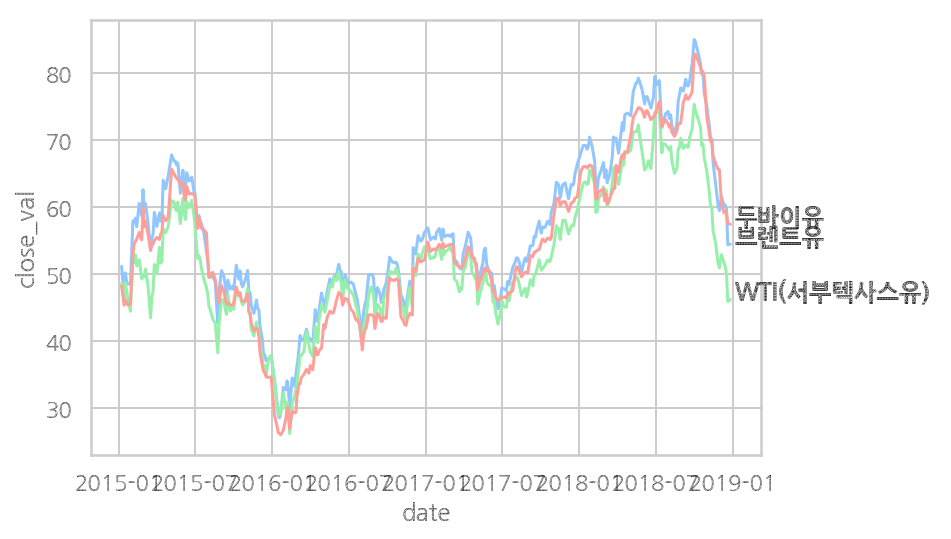

국제 금(COM@GC)
은(COM@SI)
팔라듐(NYM@PA)
백금(NYM@PL)


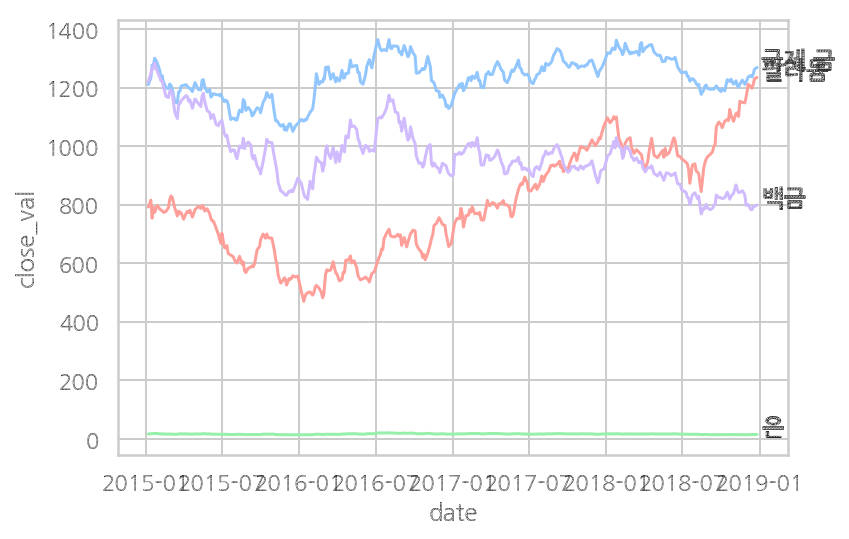

대두유(CBT$BO)
옥수수(CBT$C)
쌀(CBT$RR)
대두(CBT$S)
대두박(CBT$SM)
소맥(CBT$W)
알루미늄합금(LME@AAY)
구리(LME@CDY)
니켈(LME@NDY)
납(LME@PDY)
주석(LME@SDY)
아연(LME@ZDY)
설탕(NYB@SB)
난방유(NYM@HO)
천연가스(NYM@NG)


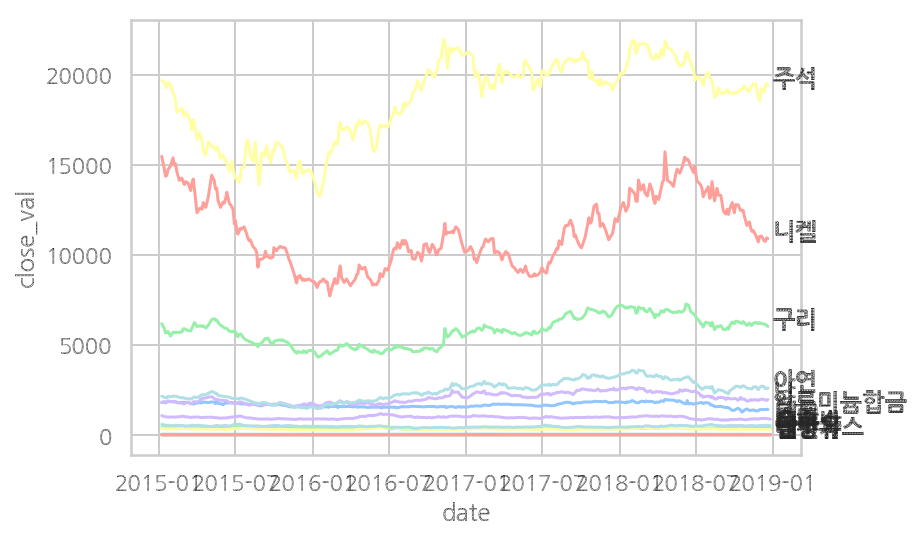

In [111]:
# 종가를 시계열로 시각화
for id, group in gOilForeign:
  getGraph(group,'close_val')
plt.show()


for id, group in gGoldForeign:
  getGraph(group,'close_val')
plt.show()

for id, group in gGoodsForeign:
  getGraph(group,'close_val')
plt.show()


그래프 시각화를 보면, 팔라듐의 그래프 형태가 금 종류 중 가장 특이한 형태를 보이고 있는데, 어떤 이슈가 있을까?

## 국내 상장 주식 데이터 시각화

In [112]:
itemChargeFull.columns

Index(['itemcode', 'itemname', 'market', 'date', 'close_val', 'change_val',
       'change_rate', 'acc_quant', 'debt_total', 'face_val', 'frgn_hold_ratio',
       'high_val', 'listed_stock', 'low_val', 'market_sum', 'net_income',
       'open_val', 'operating_profit', 'operating_profit_increasing_rate',
       'prev_quant', 'property_total', 'reserve_ratio', 'roa', 'roe', 'sales',
       'sales_increasing_rate', 'trade_stop_yn'],
      dtype='object')

In [131]:
import pandas as pd
from pandas.io.parsers import read_csv

## 국내 상장 주식 데이터 시각화
itemChargeFull = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_itemChargeFull.tsv',sep='\t')
exchange = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_exchange.tsv',sep='\t')
exchangeUSD=exchange[exchange.itemname2=='미국USD']

kospiChargeFull=itemChargeFull[itemChargeFull.market=='KOSPI']
kospi200List=kospiChargeFull.sort_values(by=['market_sum'], ascending=False).itemname.unique()[:200]
print(len(kospi200List))
kospiChargeFull['KOSPI200'] = kospiChargeFull.itemname.isin(kospi200List)
kospiChargeFull200=kospiChargeFull[kospiChargeFull.KOSPI200==True]
#print(kospiChargeFull200.head())
errFiveCount =0
errFiveDf=pd.DataFrame()


gItemChargeFull = groupByItem(kospiChargeFull200)
cnt=0
for id,group in gItemChargeFull:
  if cnt>=0 and cnt<=200:
    closeValDf = group.loc[:, ['itemname','date','frgn_hold_ratio','market_sum','close_val','net_income','sales','prev_quant']]
    closeValDf['frgn_change_ratio']=closeValDf['frgn_hold_ratio'].pct_change(fill_method = 'pad')
    closeValDf['close_chage_ratio']=closeValDf['close_val'].pct_change(fill_method='pad')
    
    itemname=closeValDf['itemname'].unique()[0]
    closeValDf=convertToDatetime(closeValDf)
    exchangeUSD=convertToDatetime(exchangeUSD)
    
    #print(c.head())
    #closeValDf=pd.merge(closeValDf, exchangeUSD.loc[:,['date','change_val']], on='date',how='left')
    closeValDf=pd.merge(closeValDf, c, on='date',how='left')
    if cnt==0:
      errFiveDf = closeValDf[closeValDf['frgn_hold_ratio'].pct_change() > 0.05]
    else:
      errFive = closeValDf[closeValDf['frgn_hold_ratio'].pct_change() > 0.05]
      errFiveDf = errFiveDf.append(errFive)
    errFiveCount+=closeValDf[closeValDf['frgn_hold_ratio'].pct_change() > 0.05].count()

    #plt.plot(closeValDf['date'],closeValDf['frgn_hold_ratio'].pct_change(), 'r')
    
    #plt.plot(closeValDf['date'],closeValDf['close_val'].pct_change(), 'b')
#     plt.title('{} 날짜별 가격 추이'.format(itemname))
#     plt.ylabel('주식 가격')
#     plt.xlabel('날짜(일)')
#     plt.style.use('seaborn-pastel')
#     plt.show()
  
  cnt+=1
  if cnt%100==0:
    print(cnt)
print('3일 전 대비 외국인 주식 보유량이 5%이상 증가한 경우는 {} 건'.format(errFiveCount))

print(errFiveDf.head())

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


200
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 typ

In [0]:
errFiveDf=errFiveDf.drop(['a', 'b'], axis=1)

In [133]:
errFiveDf.head()

itemname       date  frgn_hold_ratio  market_sum  close_val  net_income  \
89        대상 2016-02-02            12.44     11648.0    33850.0       654.0   
134       대상 2016-08-23            11.50     10994.0    31950.0       654.0   
192       대상 2017-05-10             9.84      8679.0    25050.0       654.0   
294       대상 2018-08-21            13.46      9580.0    27650.0       654.0   
172   SK네트웍스 2017-02-10            20.81     18911.0     7620.0        77.0   

        sales  prev_quant  frgn_change_ratio  close_chage_ratio  
89    29568.0     93381.0           0.054237          -0.076398  
134   29568.0     93381.0           0.060886          -0.030349  
192   29568.0     93381.0           0.051282           0.035124  
294   29568.0     93381.0           0.056515           0.135524  
172  139865.0   1258961.0           0.054205           0.028340

In [170]:
errFiveDf.corr()

frgn_hold_ratio  market_sum  close_val  net_income  \
frgn_hold_ratio           1.000000    0.303520   0.322413    0.507250   
market_sum                0.303520    1.000000   0.345852    0.671923   
close_val                 0.322413    0.345852   1.000000    0.429197   
net_income                0.507250    0.671923   0.429197    1.000000   
sales                     0.566669    0.672542   0.431698    0.948942   
prev_quant                0.072440    0.134577  -0.037431    0.073540   
frgn_change_ratio         0.197961    0.005028  -0.019531   -0.009148   
close_chage_ratio         0.022435   -0.002403   0.015498   -0.007860   

                      sales  prev_quant  frgn_change_ratio  close_chage_ratio  
frgn_hold_ratio    0.566669    0.072440           0.197961           0.022435  
market_sum         0.672542    0.134577           0.005028          -0.002403  
close_val          0.431698   -0.037431          -0.019531           0.015498  
net_income         0.948942    0.073540          -0.009148          -0.007860  
sales              1.000000    0.119386          -0.008423          -0.007422  
prev_quant         0.119386    1.000000          -0.018331           0.012308  
frgn_change_ratio -0.008423   -0.018331           1.000000           0.012244  
close_chage_ratio -0.007422    0.012308           0.012244           1.000000

In [0]:
errFiveDf2=errFiveDf.round(2)

In [210]:
errFiveDf2.corr()

frgn_hold_ratio  market_sum  close_val  net_income  \
frgn_hold_ratio           1.000000    0.303520   0.322413    0.507250   
market_sum                0.303520    1.000000   0.345852    0.671923   
close_val                 0.322413    0.345852   1.000000    0.429197   
net_income                0.507250    0.671923   0.429197    1.000000   
sales                     0.566669    0.672542   0.431698    0.948942   
prev_quant                0.072440    0.134577  -0.037431    0.073540   
frgn_change_ratio         0.198198    0.005094  -0.019210   -0.008922   
close_chage_ratio         0.022752   -0.002079   0.015512   -0.007702   

                      sales  prev_quant  frgn_change_ratio  close_chage_ratio  
frgn_hold_ratio    0.566669    0.072440           0.198198           0.022752  
market_sum         0.672542    0.134577           0.005094          -0.002079  
close_val          0.431698   -0.037431          -0.019210           0.015512  
net_income         0.948942    0.073540          -0.008922          -0.007702  
sales              1.000000    0.119386          -0.008186          -0.007044  
prev_quant         0.119386    1.000000          -0.018435           0.012681  
frgn_change_ratio -0.008186   -0.018435           1.000000           0.011543  
close_chage_ratio -0.007044    0.012681           0.011543           1.000000

In [0]:
errFiveDf2['market_sum']=errFiveDf2['market_sum'].div(100)
errFiveDf2['sales']=errFiveDf2['sales'].div(100)

In [216]:
errFiveDf2.head(3)

itemname       date  frgn_hold_ratio  market_sum  close_val  net_income  \
89        대상 2016-02-02            12.44      116.48    33850.0       654.0   
134       대상 2016-08-23            11.50      109.94    31950.0       654.0   
192       대상 2017-05-10             9.84       86.79    25050.0       654.0   

      sales  prev_quant  frgn_change_ratio  close_chage_ratio  
89   295.68     93381.0               0.05              -0.08  
134  295.68     93381.0               0.06              -0.03  
192  295.68     93381.0               0.05               0.04

In [0]:
errFiveDf2['sales']=errFiveDf2['sales'].round(0)
errFiveDf2['market_sum']=errFiveDf2['market_sum'].round(0)

In [218]:
errFiveDf2.head()

itemname       date  frgn_hold_ratio  market_sum  close_val  net_income  \
89        대상 2016-02-02            12.44       116.0    33850.0       654.0   
134       대상 2016-08-23            11.50       110.0    31950.0       654.0   
192       대상 2017-05-10             9.84        87.0    25050.0       654.0   
294       대상 2018-08-21            13.46        96.0    27650.0       654.0   
172   SK네트웍스 2017-02-10            20.81       189.0     7620.0        77.0   

      sales  prev_quant  frgn_change_ratio  close_chage_ratio  
89    296.0     93381.0               0.05              -0.08  
134   296.0     93381.0               0.06              -0.03  
192   296.0     93381.0               0.05               0.04  
294   296.0     93381.0               0.06               0.14  
172  1399.0   1258961.0               0.05               0.03

In [195]:
errFiveDf2.columns

Index(['itemname', 'date', 'frgn_hold_ratio', 'market_sum', 'close_val',
       'net_income', 'sales', 'prev_quant', 'frgn_change_ratio',
       'close_chage_ratio'],
      dtype='object')

In [0]:
errFiveDf2=errFiveDf2.fillna(method='ffill')

In [219]:
errFiveDf2.corr()

frgn_hold_ratio  market_sum  close_val  net_income  \
frgn_hold_ratio           1.000000    0.303517   0.322413    0.507250   
market_sum                0.303517    1.000000   0.345849    0.671915   
close_val                 0.322413    0.345849   1.000000    0.429197   
net_income                0.507250    0.671915   0.429197    1.000000   
sales                     0.566660    0.672542   0.431701    0.948943   
prev_quant                0.072440    0.134581  -0.037431    0.073540   
frgn_change_ratio         0.198198    0.005089  -0.019210   -0.008922   
close_chage_ratio         0.022752   -0.002069   0.015512   -0.007702   

                      sales  prev_quant  frgn_change_ratio  close_chage_ratio  
frgn_hold_ratio    0.566660    0.072440           0.198198           0.022752  
market_sum         0.672542    0.134581           0.005089          -0.002069  
close_val          0.431701   -0.037431          -0.019210           0.015512  
net_income         0.948943    0.073540          -0.008922          -0.007702  
sales              1.000000    0.119364          -0.008185          -0.007036  
prev_quant         0.119364    1.000000          -0.018435           0.012681  
frgn_change_ratio -0.008185   -0.018435           1.000000           0.011543  
close_chage_ratio -0.007036    0.012681           0.011543           1.000000

In [0]:
X = np.array(errFiveDf.drop(['frgn_hold_ratio','date','itemname','close_chage_ratio','prev_quant'], axis=1))
y = np.array(errFiveDf['frgn_hold_ratio'])


In [221]:

# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X, y) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [0]:
# import export_graphviz 
from sklearn.tree import export_graphviz  
  
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(regressor, out_file ='tree.dot', 
               feature_names =['market_sum','close_val',
       'net_income', 'sales', 'frgn_change_ratio'
       ])  

In [0]:
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

In [224]:
!apt-get install graphviz libgraphviz-dev pkg-config
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
libgraphviz-dev is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [0]:
import pygraphviz
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.390088 to fit



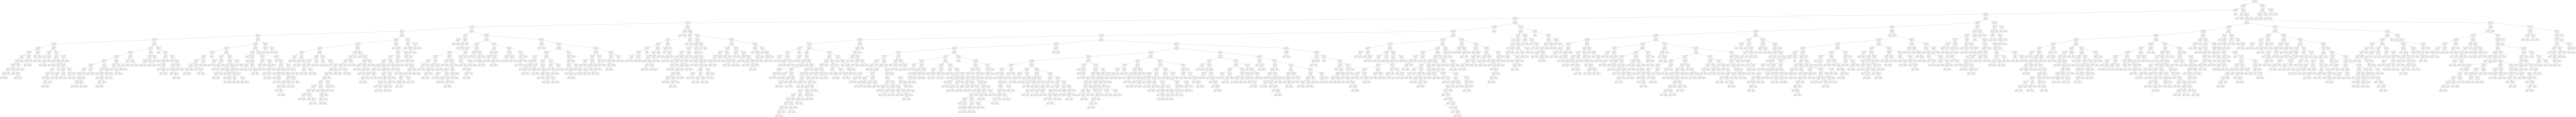

In [226]:
from sklearn.externals.six import StringIO
dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [169]:
export_graphviz(regressor, out_file ='tree.dot', 
               feature_names =['market_sum','close_val',
       'net_income', 'sales', 'prev_quant', 'frgn_change_ratio'])  

ValueError: ignored

In [0]:
## 국내 상장 주식 데이터 시각화
itemChargeFull = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_itemChargeFull.tsv',sep='\t')
exchange = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_exchange.tsv',sep='\t')
exchangeUSD=exchange[exchange.itemname2=='미국USD']

kospiChargeFull=itemChargeFull[itemChargeFull.market=='KOSPI']
kospi200List=kospiChargeFull.sort_values(by=['market_sum'], ascending=False).itemname.unique()[:200]
print(len(kospi200List))
kospiChargeFull['KOSPI200'] = kospiChargeFull.itemname.isin(kospi200List)
kospiChargeFull200=kospiChargeFull[kospiChargeFull.KOSPI200==True]
#print(kospiChargeFull200.head())
errFiveCount =0
errFiveDf=pd.DataFrame()

gItemChargeFull = groupByItem(kospiChargeFull200)
cnt=0
for id,group in gItemChargeFull:
  if cnt>=0 and cnt<=200:
    closeValDf = group.loc[:, ['itemname','date','frgn_hold_ratio','market_sum','close_val']]
    closeValDf['frgn_change_ratio']=closeValDf['frgn_hold_ratio'].pct_change(fill_method = 'pad')
    closeValDf['close_chage_ratio']=closeValDf['close_val'].pct_change(fill_method='pad')
    
    itemname=closeValDf['itemname'].unique()[0]
    closeValDf=convertToDatetime(closeValDf)
    exchangeUSD=convertToDatetime(exchangeUSD)
    
    closeValDf=pd.merge(closeValDf, exchangeUSD.loc[:,['date','change_val']], on='date',how='left')
    closeValDf=pd.merge(closeValDf, c, on='date',how='left')
    if cnt==0:
      errFiveDf = closeValDf[closeValDf['frgn_hold_ratio'].pct_change() > 0.05]
    else:
      errFive = closeValDf[closeValDf['frgn_hold_ratio'].pct_change() > 0.05]
      errFiveDf = errFiveDf.append(errFive)
    errFiveCount+=closeValDf[closeValDf['frgn_hold_ratio'].pct_change() > 0.05].count()

    #plt.plot(closeValDf['date'],closeValDf['frgn_hold_ratio'].pct_change(), 'r')
    
    #plt.plot(closeValDf['date'],closeValDf['close_val'].pct_change(), 'b')
#     plt.title('{} 날짜별 가격 추이'.format(itemname))
#     plt.ylabel('주식 가격')
#     plt.xlabel('날짜(일)')
#     plt.style.use('seaborn-pastel')
#     plt.show()
  
  cnt+=1
  if cnt%100==0:
    print(cnt)
print('3일 전 대비 외국인 주식 보유량이 5%이상 증가한 경우는 {} 건'.format(errFiveCount))

print(errFiveDf.head())

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


진원생명과학
0.7677392849866639



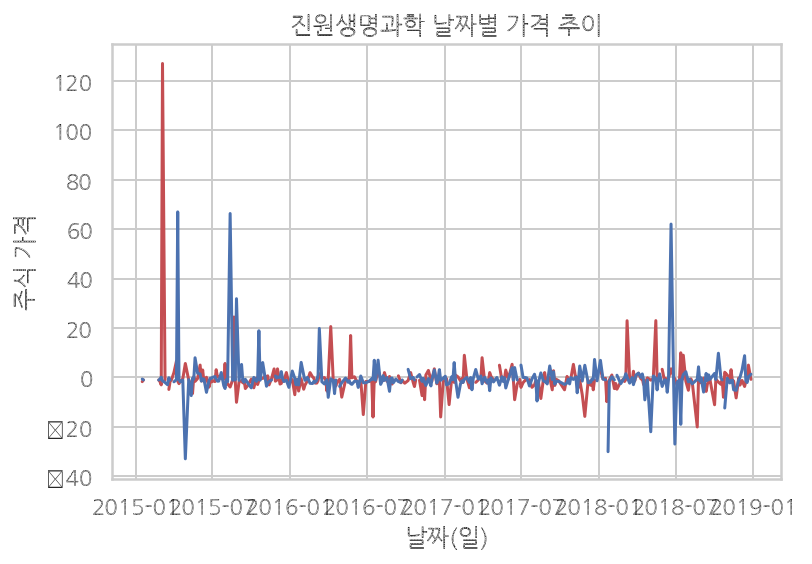

LG이노텍
0.5848661801070119



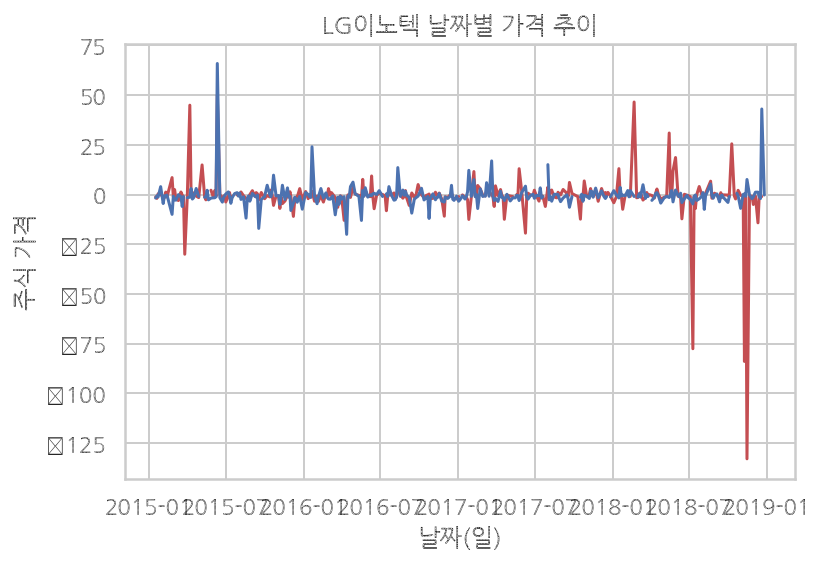

메디파트너생명공학
0.5137030691460815



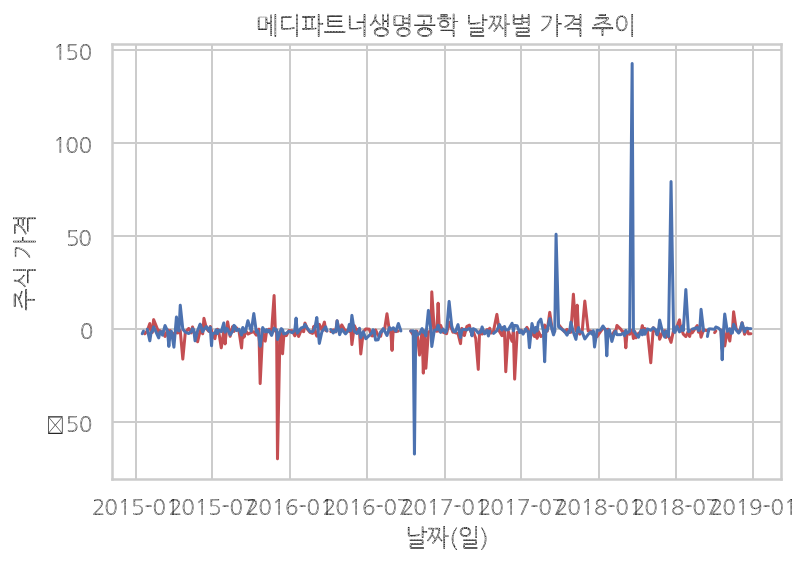

LG전자
0.5087404760981817



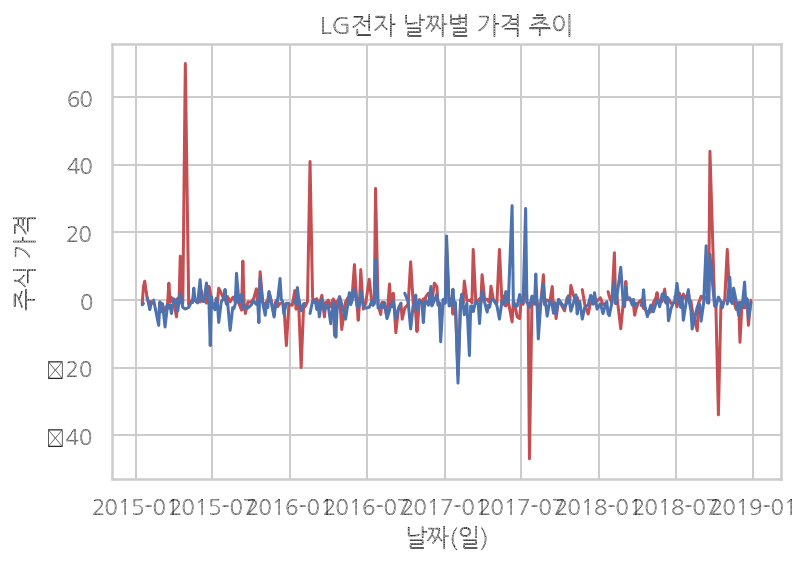

KR모터스
0.7149849705056457



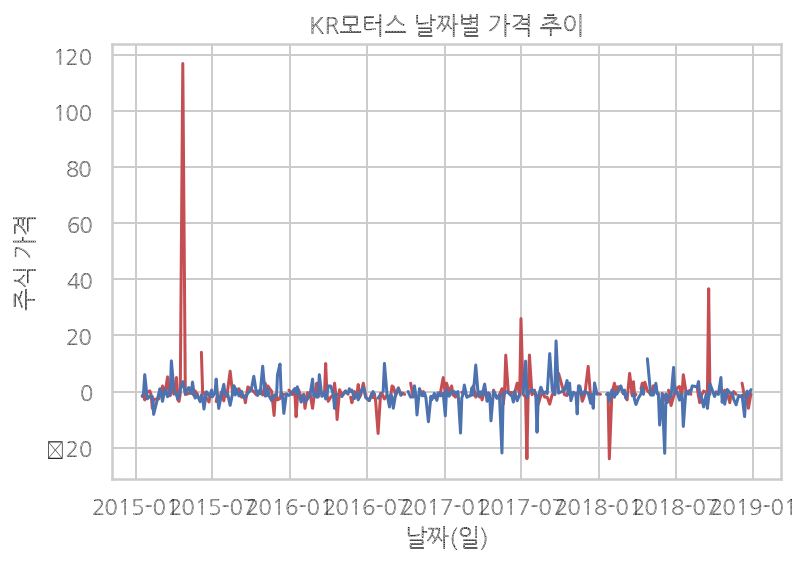

SK하이닉스
0.553781705455092



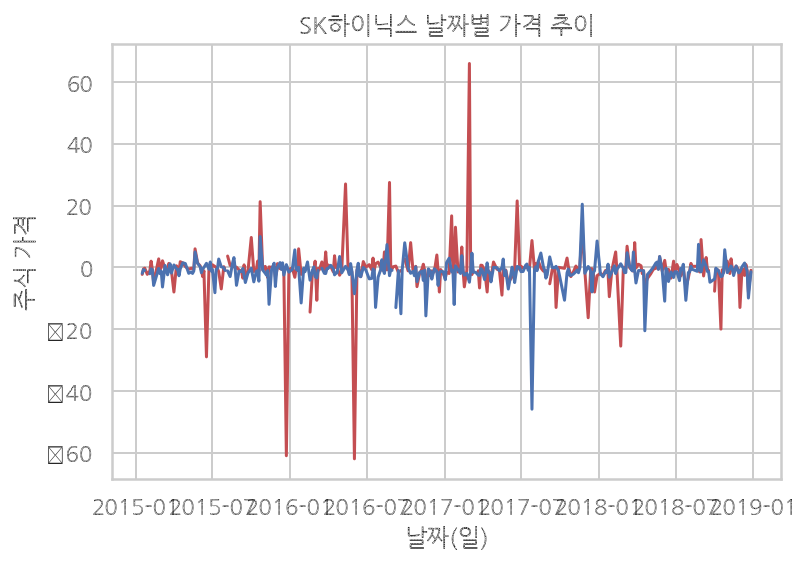

동부건설우
0.9949002355474008



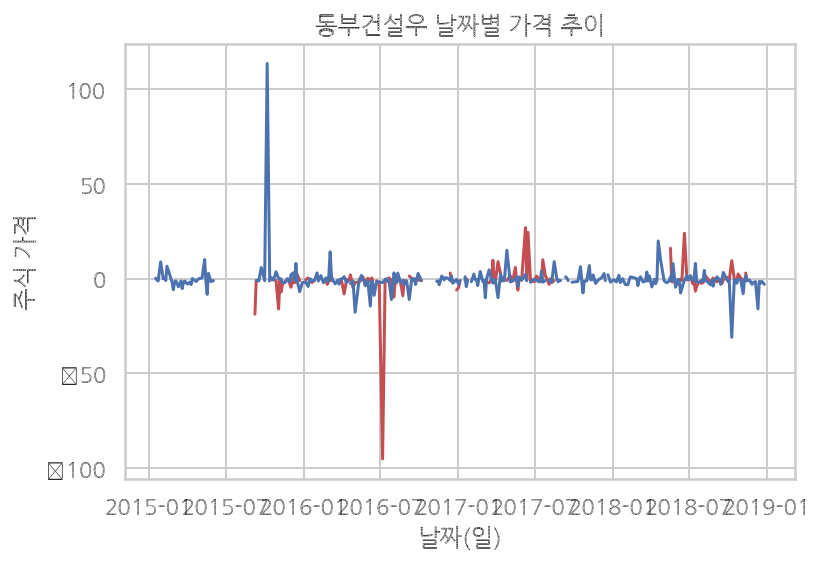

In [120]:
## 국내 상장 주식 데이터 시각화
itemChargeFull = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_itemChargeFull.tsv',sep='\t')
kospiChargeFull=itemChargeFull[itemChargeFull.market=='KOSPI']
gItemChargeFull = groupByItem(kospiChargeFull)
cnt=0
for id,group in gItemChargeFull:
  if cnt>0:
    closeValDf = group.loc[:, ['itemname','date','frgn_hold_ratio','close_val']]
    itemname=closeValDf['itemname'].unique()[0]
    closeValDf=convertToDatetime(closeValDf)
    
    closeValDf['frgn_hold_ratio']=closeValDf['frgn_hold_ratio'].pct_change()
    closeValDf['close_val']=closeValDf['close_val'].pct_change()
    fcList=list(closeValDf.columns)[2:]
    corr = closeValDf[fcList].corr(method = 'pearson')
    point=corr[corr.columns[0]][1]
    if point>0.5:
      print(itemname)
      print(point)
      print()
      plt.plot(closeValDf['date'],closeValDf['frgn_hold_ratio'].pct_change(), 'r')
      plt.plot(closeValDf['date'],closeValDf['close_val'].pct_change(), 'b')
      plt.title('{} 날짜별 가격 추이'.format(itemname))
      plt.ylabel('주식 가격')
      plt.xlabel('날짜(일)')
      plt.style.use('seaborn-pastel')
      plt.show()
      
  cnt+=1

## 데이터 중심화 경향을 보자

In [23]:
getItemNames(gOilForeign)

itemcode
IPE@EB            [브렌트유]
NYM@CL    [WTI(서부텍사스유) ]
NYM@DC            [두바이유]
Name: itemname, dtype: object

In [24]:
gOilForeign.describe()

close_val                                                             \
             count       mean        std    min     25%    50%     75%    max   
itemcode                                                                        
IPE@EB       333.0  56.134294  11.858035  28.55  48.290  54.47  63.690  84.98   
NYM@CL       333.0  51.848378  10.090894  26.21  45.830  50.18  59.130  75.30   
NYM@DC       331.0  53.774314  12.177522  26.02  45.615  52.76  61.775  82.82   

         change_val            ... high_val        low_val             \
              count      mean  ...      75%    max   count       mean   
itemcode                       ...                                      
IPE@EB        332.0  0.041054  ...   64.670  86.43   333.0  55.273754   
NYM@CL        332.0  0.043554  ...   59.270  76.47   333.0  50.999309   
NYM@DC        324.0  0.000173  ...   61.775  82.82   331.0  53.774133   

                                                          
                std    min     25%    50%     75%    max  
itemcode                                                  
IPE@EB    11.854866  27.29  47.460  53.70  63.100  84.14  
NYM@CL    10.096796  26.05  44.770  49.22  58.040  73.88  
NYM@DC    12.177421  26.02  45.615  52.76  61.775  82.82  

[3 rows x 40 columns]

In [25]:
getItemNames(gGoldForeign)

itemcode
COM@GC    [국제 금]
COM@SI       [은]
NYM@PA     [팔라듐]
NYM@PL      [백금]
Name: itemname, dtype: object

In [26]:
gGoldForeign.describe()

close_val                                                         \
             count         mean         std       min       25%       50%   
itemcode                                                                    
COM@GC       333.0  1232.231231   71.461738  1050.800  1194.100  1235.000   
COM@SI       333.0    16.350574    1.434780    13.666    15.345    16.436   
NYM@PA       333.0   797.227778  182.616772   469.800   648.000   778.700   
NYM@PL       334.0   968.938623  105.842454   768.700   907.775   957.700   

                             change_val            ...  high_val           \
               75%       max      count      mean  ...       75%      max   
itemcode                                           ...                      
COM@GC    1283.400  1364.900      332.0 -0.188855  ...  1286.000  1374.90   
COM@SI      17.143    20.666      331.0 -0.001088  ...    17.215    20.75   
NYM@PA     956.900  1234.900      333.0  0.375225  ...   958.300  1245.00   
NYM@PL    1012.875  1284.000      331.0 -0.243202  ...  1015.525  1288.90   

         low_val                                                         \
           count         mean         std       min       25%       50%   
itemcode                                                                  
COM@GC     333.0  1227.475676   71.487641  1049.600  1189.700  1231.400   
COM@SI     333.0    16.283718    1.425516    13.666    15.244    16.375   
NYM@PA     333.0   795.083033  184.142059   451.500   647.900   778.700   
NYM@PL     334.0   965.937126  104.458555   768.700   906.650   951.700   

                              
               75%       max  
itemcode                      
COM@GC    1277.800  1359.000  
COM@SI      17.101    20.405  
NYM@PA     951.050  1234.900  
NYM@PL    1006.325  1283.800  

[4 rows x 40 columns]

## 분포형태와 대칭정도를 분석해보자!
왜도(skewness) : 자료의 대칭성을 알아 볼 수 있다. 꼬리가 오른쪽으로 길면 양수의 왜도, 꼬리가 왼쪽으로 길면 음수의 왜도이다.

첨도(kurtosis) :정규 분포 대비, 데이터 분포의 뾰족한 정도를 확인할 수 있다.

In [0]:
from scipy.stats import skew
from scipy.stats import kurtosis


def getSkewKurtosis(df,colName):
  dummy=df[colName]
  return skew(dummy),kurtosis(dummy)

#groupby된 dataframe에서 가장 크고 작은 Skewness,Kurtosis의 이름을 출력하고 반환한다.
#시간대별로 1개월,3개월,6개월,1년단위로 잘라서 넣어봐도 괜찮을 것 같다.

#return dict(key:name, value:[skewness,kurtosis]) type
def getDictSkewKurtosis(groupdf,colName):
  skDict = {}  
  for id, group in groupdf:
    skewVal=0
    kurtosisVal = 0
    skewVal,kurtosisVal = getSkewKurtosis(group,colName)
    itemname = getItemNames(group)[0]
    skDict[itemname]=[skewVal,kurtosisVal]
  
  return skDict


def getMaxMinVal(dic,index):
  valueList=[]
  
  for key,value in dic.items():
#     if index==0:
#       print('{}의 왜도(skewness)는 {}'.format(key,value[index]))
#     elif index==1:
#       print('{}의 첨도(kurtosis)는 {}'.format(key,value[index]))
    
    valueList.append(value[index])
  maxVal=max(valueList)
  minVal=min(valueList)
  return maxVal,minVal
  

def analysisDict(dic):
  skewHigh,skewLow = getMaxMinVal(dic,0)
  kurtosisHigh, kurtosisLow = getMaxMinVal(dic,1)
  
  print('{} 중에서 평가합니다. '.format(list(dic.keys())))
  print('')
  if skewHigh>0 and skewLow>0:
    print('해당 데이터들은 모두 좌측으로 데이터가 치우져있습니다.')
  elif skewHigh<0 and skewLow<0:
    print('해당 데이터들은 모두 우측으로 데이터 분포가 치우쳐져 있습니다.')
  else :
    print('해당 데이터들은 왜도(skewness)의 특징이 모두 같지는 않습니다.')
    
  if kurtosisHigh<3 and kurtosisLow<3:
    print('해당 데이터들은 모두 정규분포보다 데이터 분포가 퍼져 있습니다.')
  elif kurtosisHigh>3 and kurtosisLow>3:
    print('해당 데이터들은 모두 정규분포보다 데이터 분포가 중앙에 집중 되어 있습니다.')
  else :
    print('해당 데이터들은 첨도(kurtosis)의 특징이 모두 같지는 않습니다')
  
  
  print('max Skewness value은 {} 이고, min Skewness value은 {} 입니다'.format(skewHigh,skewLow))
  print('max kurtosis value은 {} 이고, min kurtosis value은 {} 입니다'.format(kurtosisHigh,kurtosisLow))
  print()

In [28]:
dic1 = getDictSkewKurtosis(gOilForeign,'close_val')
dic2 = getDictSkewKurtosis(gGoldForeign,'close_val')
dic3 = getDictSkewKurtosis(gGoodsForeign,'close_val')

analysisDict(dic1)
analysisDict(dic2)
analysisDict(dic3)

['브렌트유', 'WTI(서부텍사스유) ', '두바이유'] 중에서 평가합니다. 

해당 데이터들은 모두 좌측으로 데이터가 치우져있습니다.
해당 데이터들은 모두 정규분포보다 데이터 분포가 퍼져 있습니다.
max Skewness value은 0.2810707721027385 이고, min Skewness value은 0.16060428525459722 입니다
max kurtosis value은 -0.28367436245456146 이고, min kurtosis value은 -0.3744093901243071 입니다

['국제 금', '은', '팔라듐', '백금'] 중에서 평가합니다. 

해당 데이터들은 왜도(skewness)의 특징이 모두 같지는 않습니다.
해당 데이터들은 모두 정규분포보다 데이터 분포가 퍼져 있습니다.
max Skewness value은 0.6172025603090334 이고, min Skewness value은 -0.47091208479140567 입니다
max kurtosis value은 0.18396461964090616 이고, min kurtosis value은 -0.8742654389263262 입니다

['대두유', '옥수수', '쌀', '대두', '대두박', '소맥', '알루미늄합금', '구리', '니켈', '납', '주석', '아연', '설탕', '난방유', '천연가스'] 중에서 평가합니다. 

해당 데이터들은 왜도(skewness)의 특징이 모두 같지는 않습니다.
해당 데이터들은 모두 정규분포보다 데이터 분포가 퍼져 있습니다.
max Skewness value은 0.8943255723361463 이고, min Skewness value은 -0.5357072765403734 입니다
max kurtosis value은 2.1269535540811804 이고, min kurtosis value은 -1.22723197777784 입니다



### 데이터를 회귀분석에 맞게 정제해볼까?

In [29]:
for key in allDataDict.keys():
  print(key)

goldKorea
goldForeign
oilKorea
oilForeign
exchange
goodsForeign
foreignCharge
itemChargeFull
koreaIndex


In [30]:
gKoreaIndex=groupByItem(koreaIndex)
getItemCodes(gKoreaIndex)

itemcode
KOSDAQ    [KOSDAQ]
KOSPI      [KOSPI]
KPI200    [KPI200]
Name: itemcode, dtype: object

In [31]:
oilNames=getItemNames(gOilForeign)
print(oilNames)

goldNames=getItemNames(gGoldForeign)
print(goldNames)

itemcode
IPE@EB            [브렌트유]
NYM@CL    [WTI(서부텍사스유) ]
NYM@DC            [두바이유]
Name: itemname, dtype: object
itemcode
COM@GC    [국제 금]
COM@SI       [은]
NYM@PA     [팔라듐]
NYM@PL      [백금]
Name: itemname, dtype: object


In [32]:
closeValDf = pd.DataFrame()
itemChargeFull = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_itemChargeFull.tsv',sep='\t')
kospiChargeFull=itemChargeFull[itemChargeFull.market=='KOSPI']
gItemChargeFull = groupByItem(kospiChargeFull)
cnt=0
for id,group in gItemChargeFull:
  itemcode = str(getItemCodes(group)[0])
  if cnt==0 or cnt==1:
    closeValDf = pd.DataFrame()
    closeValDf = group.loc[:, ['date','close_val']]
    closeValDf.rename(columns={'close_val':itemcode}, inplace=True)
    
  dummyCloseVal = group.loc[:, ['date','close_val']]
  dummyCloseVal.rename(columns={'close_val':itemcode}, inplace=True)
  
  closeValDf=pd.merge(closeValDf, dummyCloseVal, on='date',how='left')
  cnt+=1
  
  if cnt%100==0:
    print(cnt)
    
print(len(closeValDf))


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


100
200
300
400
500
600
700
800
323


In [33]:
itemChargeFull.head(1)

itemcode itemname market      date  close_val  change_val  change_rate  \
0   000020     동화약품  KOSPI  20150107     5540.0        70.0         1.26   

   acc_quant  debt_total  face_val  ...  operating_profit  \
0    42517.0       732.0      1000  ...             112.0   

   operating_profit_increasing_rate  prev_quant  property_total  \
0                               NaN     62744.0          3706.0   

   reserve_ratio  roa  roe   sales  sales_increasing_rate  trade_stop_yn  
0         967.43  NaN  NaN  3066.0                    NaN              N  

[1 rows x 27 columns]

In [34]:
print(itemChargeFull[itemChargeFull['market']=='KOSPI']['itemcode'].unique()[:10])

['000020' '000040' '000050' '000060' '000070' '000075' '000080' '000087'
 '000100' '000105']


In [35]:
closeValDf.head()

date   1530_x   1530_y     1550    1560    1570    1620     1630  \
0  20150107  74800.0  74800.0  12050.0  8120.0  1310.0  2305.0  59000.0   
1  20150113  73600.0  73600.0  11800.0  7980.0  1280.0  2340.0  60300.0   
2  20150116  72700.0  72700.0  11800.0  7020.0  1305.0  2415.0  59300.0   
3  20150119  72200.0  72200.0  11750.0  7050.0  1320.0  2455.0  60000.0   
4  20150122  72000.0  72000.0  11350.0  7030.0  1330.0  2410.0  59700.0   

      1680     1685  ...  286940  293480  294870  298000  298020  298040  \
0  33700.0  12550.0  ...     NaN     NaN     NaN     NaN     NaN     NaN   
1  32150.0  12000.0  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2  32500.0  12300.0  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3  33000.0  12250.0  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4  35050.0  13400.0  ...     NaN     NaN     NaN     NaN     NaN     NaN   

   298050  298690  300720  306200  
0     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN  
2     NaN     NaN     NaN     NaN  
3     NaN     NaN     NaN     NaN  
4     NaN     NaN     NaN     NaN  

[5 rows x 885 columns]

In [0]:
closeValDfs2=closeValDf.fillna(method='ffill')

In [0]:
closeValDfs3=closeValDfs2.dropna(axis=1)

In [38]:
closeValDfs3.head()

date   1530_x   1530_y     1550    1560    1570    1620     1630  \
0  20150107  74800.0  74800.0  12050.0  8120.0  1310.0  2305.0  59000.0   
1  20150113  73600.0  73600.0  11800.0  7980.0  1280.0  2340.0  60300.0   
2  20150116  72700.0  72700.0  11800.0  7020.0  1305.0  2415.0  59300.0   
3  20150119  72200.0  72200.0  11750.0  7050.0  1320.0  2455.0  60000.0   
4  20150122  72000.0  72000.0  11350.0  7030.0  1330.0  2410.0  59700.0   

      1680     1685  ...  085310   180640   18064K   181710    183190  \
0  33700.0  12550.0  ...  3840.0  31350.0  13500.0  91400.0  120000.0   
1  32150.0  12000.0  ...  3930.0  29950.0  13350.0  80400.0  115000.0   
2  32500.0  12300.0  ...  3690.0  31650.0  13400.0  82500.0  113000.0   
3  33000.0  12250.0  ...  3840.0  30800.0  13250.0  80700.0  110000.0   
4  35050.0  13400.0  ...  4205.0  31150.0  13700.0  72700.0  117000.0   

    185750    192400    192820   200880    204320  
0  64500.0  180000.0   99300.0  13950.0  177500.0  
1  60400.0  179000.0  103500.0  14550.0  170000.0  
2  58300.0  176000.0  114500.0  13450.0  164000.0  
3  56500.0  177500.0  114500.0  13450.0  164500.0  
4  56000.0  173000.0  101000.0  12750.0  160500.0  

[5 rows x 804 columns]

In [39]:
closeValDfs3=convertToDatetime(closeValDfs3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [0]:
koreaIndex = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_koreaIndex.tsv',sep='\t')

In [0]:
kospiIndex=koreaIndex[koreaIndex.itemcode=='KPI200']

In [42]:
kospiIndex.head(1)

itemcode      date  close_val  change_val  change_rate  acc_quant  \
646   KPI200  20150107      24053        60.0         0.25      53965   

     acc_amount  
646     2578977

In [0]:
kospi = kospiIndex.loc[:, ['date','close_val']]
kospi2 = convertToDatetime(kospi)
kospi2.rename(columns={'close_val':'KOSPI'}, inplace=True)
resultDf3=pd.merge(closeValDfs3, kospi2, on='date',how='left')

In [44]:
frgnHoldRatio=pd.DataFrame(itemChargeFull.loc[:,['date','frgn_hold_ratio']])
frgnHoldRatio2=convertToDatetime(frgnHoldRatio)
frgnHoldRatio3=groupByItem(frgnHoldRatio2)
frgnKospi=pd.merge(frgnHoldRatio2, kospi2, on='date',how='left')


KeyError: ignored

In [0]:
frgnKospi

In [0]:
frgnKospiRtn=frgnKospi.dropna(axis=0)

In [0]:
frgnKospiRtn.head()

In [0]:
frgnKospiRtn=setDateIndex(frgnKospiRtn)
frgnKospiRtn = (1 + frgnKospiRtn.pct_change()) # 일일수익률
frgnKospiRtn = frgnKospiRtn.dropna()
#cumm_rtn = cumm_rtn.tail(100)  


In [0]:
frgnKospiRtn

In [0]:
corr = frgnKospiRtn.corr(method = 'pearson')
print(corr)

In [51]:
showScatter(frgnKospiRtn,'frgn_hold_ratio','KOSPI')

NameError: ignored

In [0]:
resultDf3.head()

In [0]:
resultDfs=convertToDatetime(resultDf3)
resultDfs=setDateIndex(resultDfs)

In [0]:
resultDfs.head()

In [0]:
resultDfs.shape

In [0]:
resultDfs.isnull().sum().sum()

In [0]:
finalDf=resultDfs.fillna(method='ffill')

In [0]:
finalDf.shape

In [0]:
colList=list(resultDfs.columns)
xCol=colList[:-1]
yCol=colList[-1:]
print(yCol)

In [0]:
def showScatter(df,xColName,yColName):
  plt.scatter(df[xColName], df[yColName], color='red')
  plt.title('Stock {} Change Rate Vs {} Change Rate'.format(xColName,yColName), fontsize=14)
  plt.xlabel('Stock {} Change Rate'.format(xColName), fontsize=14)
  plt.ylabel('{} Change Rate'.format(yColName), fontsize=14)
  plt.ylim(0)
  plt.xlim(0)
  plt.grid(True)
  plt.show()


In [0]:
skList=xCol.copy()
skList.append(yCol[-1])
  

In [0]:
corr = resultDfs[skList].corr(method = 'pearson')
#print(corr)

In [0]:
# KOSPI200 종가데이터와 양의 상관계수를 가진 주식의 종가 데이터
print(corr.loc[corr['KOSPI'] > 0.95])

In [0]:
def showCodeToName(code):
  print(itemChargeFull[itemChargeFull.itemcode==code].itemname.unique())

In [0]:
showCodeToName('086790')
showScatter(resultDfs,'86790','KOSPI')
showCodeToName('105560')
showScatter(resultDfs,'105560','KOSPI')
showCodeToName('005940')
showScatter(resultDfs,'005940','KOSPI'

In [0]:
import statsmodels.tsa.stattools as ts

def getCoin(df,xColName,yColName):
  x1=resultDfs[xColName]
  y1=resultDfs[yColName]
  score,pvalue,_ = ts.coint(x1, y1) 
  return score,pvalue

In [0]:
resultDfs.head()

In [0]:
print(getCoin(resultDfs,'005930','KOSPI'))

In [0]:
from sklearn.preprocessing import MinMaxScaler

data = np.array(finalDf)
scaler = MinMaxScaler(copy=True, feature_range=(0,1))
scaler.fit(data)
print(scaler.data_max_)
data = scaler.transform(data) 

In [0]:
data[0].shape

In [0]:
dataT = np.transpose(data)

In [0]:
# data split
x_data = dataT[0:-8 , :]
y_data = dataT[-8: , : ]

In [0]:
plt.plot(range(len(x_data[0])), x_data[0], 'r')
plt.title('날짜별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('날짜(일)')
plt.style.use('seaborn-pastel')
plt.show()

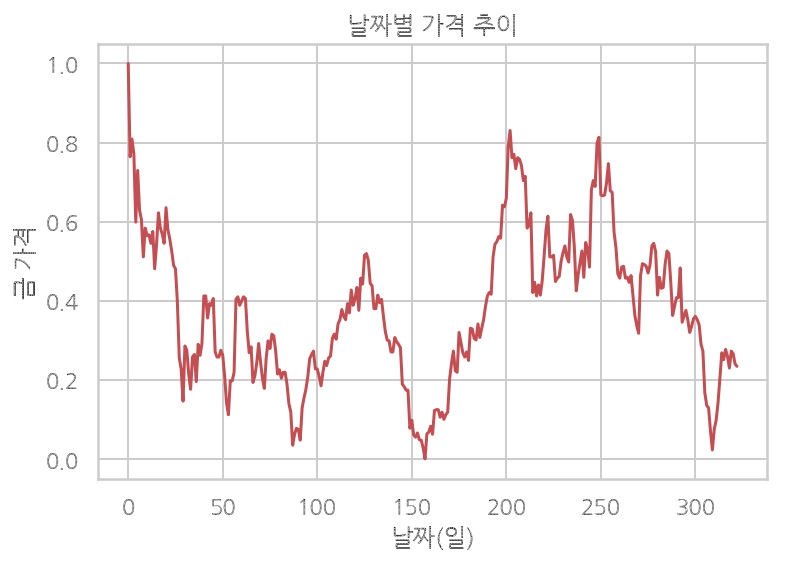

In [130]:
plt.plot(range(len(y_data[0])), y_data[0], 'r')
plt.title('날짜별 가격 추이')
plt.ylabel('금 가격')
plt.xlabel('날짜(일)')
plt.style.use('seaborn-pastel')
plt.show()

In [131]:
print(x_data[0:1].shape)
print(y_data[0:1].shape)

(1, 323)
(1, 323)


### Lasso regression을 활용하여 활용 변수를 찾아보자

In [132]:
from sklearn import linear_model
import statsmodels.api as sm
from scipy import stats

# In the first case, when interest rates go up, the stock index price also goes up
# In the second case, when unemployment rates go up, the stock index price goes down
# (here we still have a linear relationship, but with a negative slope)

#  ##################################################################################################3
# with sklearn
# here we have 2 variables for multiple regression.
# If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.
# Alternatively, you may add additional variables within the brackets
# Y = C + M1*X1 + M2*X2 + ....
X = Stock_Market_df[['Interest_Rate','Unemployment_Rate']]
y = Stock_Market_df['Stock_Index_Price']
regressor = linear_model.LinearRegression()
regressor.fit(X, y)
print(X)
print('Intercept: ', regressor.intercept_)
print('Coefficients: ', regressor.coef_)


# prediction with sklearn
New_Interest_Rate = 2.75
New_Unemployment_Rate = 5.3
print('Predicted Stock Index Price:', regressor.predict([[New_Interest_Rate, New_Unemployment_Rate]]))
print("___________________________________________________________")

#  ##################################################################################################3
# with statsmodels
X = sm.add_constant(X)  # adding a constant
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
print(model_summary)

# Y = C + M1*X1 + M2*X2 + ....
# Predicted_Stock_Index_Price = (const coef) + (Interest_Rate coef)*X1 + (Unemployment_Rate coef)*X2
Predicted_Stock_Index_Price = 1798.4040 + (345.5401 * 2.75) + (-250.1466 * 5.3)
print("Predicted_Stock_Index_Price = ", Predicted_Stock_Index_Price)
print("___________________________________________________________________")

NameError: ignored

In [0]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha=0.3, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

In [0]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [0]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

In [0]:
goldForeign = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_goldForeign.tsv',sep='\t')
gGoldForeign=groupByItem(goldForeign)
gold = pd.DataFrame()
resultDf=closeValDfs.copy(deep=False) #결측치 열 제거한 Dataframe
goldCodes=getItemCodes(gGoldForeign)
for id, group in gGoldForeign:
  gold = group.copy(deep=False)
  foreignGold = gold.loc[:, ['date','change_rate']]
  foreignGold.rename(columns={'change_rate':id}, inplace=True)
  resultDf=pd.merge(resultDf, foreignGold, on='date',how='left')

In [0]:
resultDf.head()

In [0]:
oilForeign = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_oilForeign.tsv',sep='\t')
gOilForeign=groupByItem(oilForeign)
oil = pd.DataFrame()
resultDf2=resultDf.copy(deep=False)
oilCodes=getItemCodes(gOilForeign)
for id, group in gOilForeign:
  oil = group.copy(deep=False)
  foreignOil = oil.loc[:, ['date','change_rate']]
  foreignOil.rename(columns={'change_rate':id}, inplace=True)
  resultDf2=pd.merge(resultDf2, foreignOil, on='date',how='left')

In [0]:
resultDf2.head()

In [0]:
resultDf2=convertToDatetime(resultDf2)